In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(x, y):
    return x**2 + 100*y**2

def grads(x, y):
    return 2*x, 200*y

def update_correct(x, y, step):
    L = loss_fn(x, y)
    dLdx, dLdy = grads(x, y)

    grad_norm_sq = dLdx**2 + dLdy**2
    alpha = L / grad_norm_sq

    x_new = x - alpha * dLdx
    y_new = y - alpha * dLdy

    print(f"\nStep {step} — CORRECT")
    print(f"  x_old = {x.item(): .6f}, y_old = {y.item(): .6f}")
    print(f"  Loss  = {L.item(): .6f}")
    print(f"  dL/dx = {dLdx.item(): .6f}, dL/dy = {dLdy.item(): .6f}")
    print(f"  grad_norm_sq = {grad_norm_sq.item(): .6f}")
    print(f"  alpha = {alpha.item(): .6f}")
    print(f"  x_new = {x_new.item(): .6f}, y_new = {y_new.item(): .6f}")

    return x_new, y_new

def update_wrong(x, y, step):
    L = loss_fn(x, y)
    dLdx, dLdy = grads(x, y)

    x_new = x - L / dLdx
    y_new = y - L / dLdy

    print(f"\nStep {step} — WRONG")
    print(f"  x_old = {x.item(): .6f}, y_old = {y.item(): .6f}")
    print(f"  Loss  = {L.item(): .6e}")
    print(f"  dL/dx = {dLdx.item(): .6e}, dL/dy = {dLdy.item(): .6e}")
    print(f"  x_new = {x_new.item(): .6f}, y_new = {y_new.item(): .6f}")

    return x_new, y_new


def run(method, steps=10, x0=1.0, y0=1.0):
    x = torch.tensor(x0)
    y = torch.tensor(y0)

    traj = [(x.item(), y.item(), loss_fn(x, y).item())]

    for i in range(steps):
        x, y = method(x, y, i)
        traj.append((x.item(), y.item(), loss_fn(x, y).item()))

    return traj


In [19]:

steps = 100

traj_correct = run(update_correct, steps)
traj_wrong = run(update_wrong, steps)



Step 0 — CORRECT
  x_old =  1.000000, y_old =  1.000000
  Loss  =  11.000000
  dL/dx =  2.000000, dL/dy =  20.000000
  grad_norm_sq =  404.000000
  alpha =  0.027228
  x_new =  0.945545, y_new =  0.455446

Step 1 — CORRECT
  x_old =  0.945545, y_old =  0.455446
  Loss  =  2.968361
  dL/dx =  1.891089, dL/dy =  9.108911
  grad_norm_sq =  86.548470
  alpha =  0.034297
  x_new =  0.880686, y_new =  0.143036

Step 2 — CORRECT
  x_old =  0.880686, y_old =  0.143036
  Loss  =  0.980201
  dL/dx =  1.761371, dL/dy =  2.860728
  grad_norm_sq =  11.286193
  alpha =  0.086850
  x_new =  0.727711, y_new = -0.105417

Step 3 — CORRECT
  x_old =  0.727711, y_old = -0.105417
  Loss  =  0.640691
  dL/dx =  1.455423, dL/dy = -2.108333
  grad_norm_sq =  6.563324
  alpha =  0.097617
  x_new =  0.585638, y_new =  0.100392

Step 4 — CORRECT
  x_old =  0.585638, y_old =  0.100392
  Loss  =  0.443757
  dL/dx =  1.171275, dL/dy =  2.007840
  grad_norm_sq =  5.403308
  alpha =  0.082127
  x_new =  0.489444, y_

In [20]:
print("Step | Correct      | Wrong ")
for i in range(steps + 1):
    print(f"{i:>4} | "
          f"{traj_correct[i][2]:.6f} | "
          f"{traj_wrong[i][2]:.6f}")


Step | Correct      | Wrong 
   0 | 11.000000 | 11.000000
   1 | 2.968361 | 22.275000
   2 | 0.980201 | 45.106869
   3 | 0.640691 | 91.341370
   4 | 0.443757 | 184.966202
   5 | 0.281166 | 374.556396
   6 | 0.202312 | 758.476013
   7 | 0.119364 | 1535.912476
   8 | 0.090196 | 3110.218506
   9 | 0.046091 | 6298.185059
  10 | 0.026200 | 12753.808594
  11 | 0.012452 | 25826.435547
  12 | 0.004188 | 52298.492188
  13 | 0.002780 | 105904.390625
  14 | 0.001884 | 214456.203125
  15 | 0.001237 | 434273.593750
  16 | 0.000852 | 879403.312500
  17 | 0.000545 | 1780790.375000
  18 | 0.000388 | 3606097.000000
  19 | 0.000234 | 7302339.000000
  20 | 0.000175 | 14787219.000000
  21 | 0.000094 | 29944080.000000
  22 | 0.000063 | 60636672.000000
  23 | 0.000029 | 122789080.000000
  24 | 0.000008 | 248647488.000000
  25 | 0.000006 | 503510304.000000
  26 | 0.000003 | 1019606848.000000
  27 | 0.000001 | 2064701184.000000
  28 | 0.000001 | 4181014272.000000
  29 | 0.000000 | 8466545152.000000
  30 | 0.0

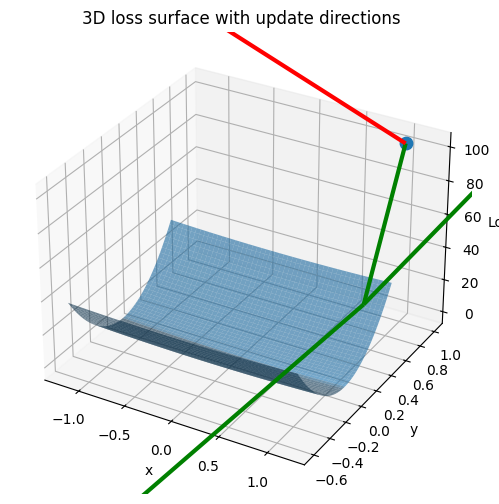

In [8]:
# ONE-CELL DEMO: 3D surface + update directions

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loss and gradients
def loss_fn(x, y):
    return x**2 + 100*y**2

def grads(x, y):
    return 2*x, 200*y

# Starting point
x0, y0 = 1.0, 1.0
L0 = loss_fn(x0, y0)
dLdx, dLdy = grads(x0, y0)

# Correct update direction
grad_norm_sq = dLdx**2 + dLdy**2
alpha = L0 / grad_norm_sq
dx_correct = -alpha * dLdx
dy_correct = -alpha * dLdy
dz_correct = loss_fn(x0 + dx_correct, y0 + dy_correct) - L0

# Wrong (+ /2) direction
dx_wrong = -L0 / (2 * dLdx)
dy_wrong = -L0 / (2 * dLdy)
dz_wrong = loss_fn(x0 + dx_wrong, y0 + dy_wrong) - L0

# Create surface
xs = np.linspace(-1.2, 1.2, 200)
ys = np.linspace(-0.6, 0.6, 200)
X, Y = np.meshgrid(xs, ys)
Z = X**2 + 100 * Y**2

# Plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.6)
ax.scatter(x0, y0, L0, s=80)

ax.quiver(x0, y0, L0,
          dx_correct, dy_correct, dz_correct,
          color='green', linewidth=3, label='Correct')

ax.quiver(x0, y0, L0,
          dx_wrong, dy_wrong, dz_wrong,
          color='red', linewidth=3, label='Wrong + /2')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Loss")
ax.set_title("3D loss surface with update directions")

plt.show()


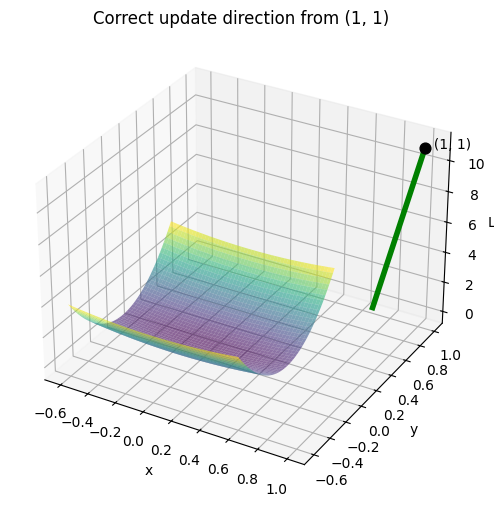

In [17]:
# Clean 3D diagram: surface + ONE correct direction

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loss and gradients
def loss_fn(x, y):
    return x**2 + 10*y**2

def grads(x, y):
    return 2*x, 20*y

# Starting point
x0, y0 = 1.0, 1.0
L0 = loss_fn(x0, y0)
dLdx, dLdy = grads(x0, y0)

# Correct update direction
grad_norm_sq = dLdx**2 + dLdy**2
alpha = L0 / grad_norm_sq

dx = -alpha * dLdx
dy = -alpha * dLdy
dz = loss_fn(x0 + dx, y0 + dy) - L0

# Surface
xs = np.linspace(-0.6, 0.6, 300)
ys = np.linspace(-0.6, 0.6, 300)
X, Y = np.meshgrid(xs, ys)
Z = X**2 + 10 * Y**2

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, alpha=0.6, cmap="viridis")

# Starting point
ax.scatter(x0, y0, L0, color="black", s=60)
ax.text(x0, y0, L0, "  (1, 1)", fontsize=10)

# Correct direction as a single line
ax.plot(
    [x0, x0 + dx],
    [y0, y0 + dy],
    [L0, L0 + dz],
    color="green",
    linewidth=4
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Loss")
ax.set_title("Correct update direction from (1, 1)")

plt.show()


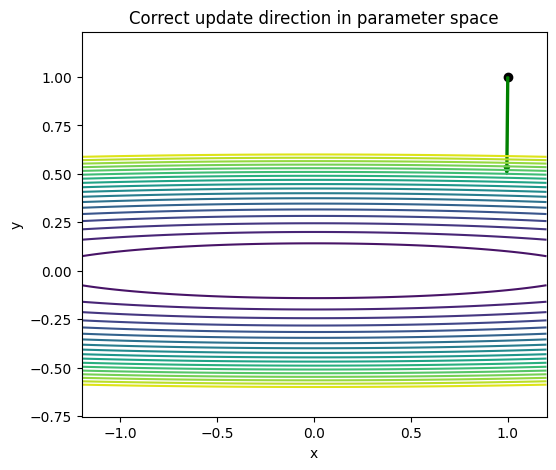

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(x, y):
    return x**2 + 100*y**2

def grads(x, y):
    return 2*x, 200*y

# Point
x0, y0 = 1.0, 1.0
L0 = loss_fn(x0, y0)
dLdx, dLdy = grads(x0, y0)

# Correct update
grad_norm_sq = dLdx**2 + dLdy**2
alpha = L0 / grad_norm_sq
dx = -alpha * dLdx
dy = -alpha * dLdy

# Contours
xs = np.linspace(-1.2, 1.2, 400)
ys = np.linspace(-0.6, 0.6, 400)
X, Y = np.meshgrid(xs, ys)
Z = X**2 + 100*Y**2

plt.figure(figsize=(6, 5))
plt.contour(X, Y, Z, levels=20)
plt.scatter([x0], [y0], c="black")
plt.arrow(x0, y0, dx, dy,
          color="green", width=0.01, length_includes_head=True)

plt.axis("equal")
plt.title("Correct update direction in parameter space")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
